In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

from warnings import filterwarnings
filterwarnings('ignore')

from scipy.linalg import svd
from random import shuffle, seed
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Import the data

In [2]:
vehicles_df = pd.read_csv('data/vehicles.csv')
df = vehicles_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [3]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
# find duplicates
df_dupes = df[df[['VIN', 'price', 'odometer']].duplicated() == True]
df_dupes

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
11,7218325704,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
12,7217788283,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
13,7217147606,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
14,7209027818,el paso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx
20,7216672204,bellingham,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [5]:
df = df.drop_duplicates(subset=['VIN', 'price', 'odometer'], keep='first')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211771 entries, 0 to 426838
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            211771 non-null  int64  
 1   region        211771 non-null  object 
 2   price         211771 non-null  int64  
 3   year          211090 non-null  float64
 4   manufacturer  203395 non-null  object 
 5   model         209174 non-null  object 
 6   condition     123587 non-null  object 
 7   cylinders     134897 non-null  object 
 8   fuel          210029 non-null  object 
 9   odometer      209748 non-null  float64
 10  title_status  207566 non-null  object 
 11  transmission  210423 non-null  object 
 12  VIN           122920 non-null  object 
 13  drive         154391 non-null  object 
 14  size          73041 non-null   object 
 15  type          163607 non-null  object 
 16  paint_color   150600 non-null  object 
 17  state         211771 non-null  object 
dtypes: f

In [6]:
df = df.drop(columns=['id', 'VIN', 'size', 'cylinders','condition','drive','paint_color','type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211771 entries, 0 to 426838
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        211771 non-null  object 
 1   price         211771 non-null  int64  
 2   year          211090 non-null  float64
 3   manufacturer  203395 non-null  object 
 4   model         209174 non-null  object 
 5   fuel          210029 non-null  object 
 6   odometer      209748 non-null  float64
 7   title_status  207566 non-null  object 
 8   transmission  210423 non-null  object 
 9   state         211771 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 17.8+ MB


In [7]:
df = df.convert_dtypes()
df.isna().sum().sort_values(ascending=True)

region             0
price              0
state              0
year             681
transmission    1348
fuel            1742
odometer        2023
model           2597
title_status    4205
manufacturer    8376
dtype: int64

In [10]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193483 entries, 27 to 426833
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        193483 non-null  float64
 1   price         193483 non-null  Int64  
 2   year          193483 non-null  Int64  
 3   manufacturer  193483 non-null  string 
 4   model         193483 non-null  string 
 5   fuel          193483 non-null  string 
 6   odometer      193483 non-null  Int64  
 7   title_status  193483 non-null  string 
 8   transmission  193483 non-null  string 
 9   state         193483 non-null  string 
dtypes: Int64(3), float64(1), string(6)
memory usage: 16.8 MB


In [11]:
def encode(df, columns):
    enc = OrdinalEncoder()
    
    for column in columns:
        df[column] = enc.fit_transform(df[[column]])

In [12]:
cols_to_encode = ['region', 'transmission','fuel','odometer','model','title_status','manufacturer','state']

encode(df, cols_to_encode)

In [13]:
# drop price <= 1,000 & > 25,000

less_1000 = df.index[np.where(df['price'] <= 1000)]
greater_25000 = df.index[np.where(df['price'] > 25000)]

print(f'num prices <= 1000 {len(less_1000)}')
print(f'num prices > 25000 {len(greater_25000)}')

df = (df.drop(less_1000))
df = (df.drop(greater_25000))
df.info()

num prices <= 1000 19933
num prices > 25000 35724
<class 'pandas.core.frame.DataFrame'>
Int64Index: 137826 entries, 28 to 426833
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        137826 non-null  float64
 1   price         137826 non-null  Int64  
 2   year          137826 non-null  Int64  
 3   manufacturer  137826 non-null  float64
 4   model         137826 non-null  float64
 5   fuel          137826 non-null  float64
 6   odometer      137826 non-null  float64
 7   title_status  137826 non-null  float64
 8   transmission  137826 non-null  float64
 9   state         137826 non-null  float64
dtypes: Int64(2), float64(8)
memory usage: 11.8 MB


In [14]:
# drop year < 1925
year_less_1925 = df.index[np.where(df['year'] < 1925)]

print(f'num year < 1925 {len(year_less_1925)}')

df = (df.drop(year_less_1925))
df.info()

num year < 1925 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 137805 entries, 28 to 426833
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        137805 non-null  float64
 1   price         137805 non-null  Int64  
 2   year          137805 non-null  Int64  
 3   manufacturer  137805 non-null  float64
 4   model         137805 non-null  float64
 5   fuel          137805 non-null  float64
 6   odometer      137805 non-null  float64
 7   title_status  137805 non-null  float64
 8   transmission  137805 non-null  float64
 9   state         137805 non-null  float64
dtypes: Int64(2), float64(8)
memory usage: 11.8 MB


In [15]:
# drop odometer < 1,000 & > 400,000

odo_less_1000 = df.index[np.where(df['odometer'] < 1000)]
odo_more_400000 = df.index[np.where(df['odometer'] > 400000)]

print(f'num odometer < 1000 {len(odo_less_1000)}')
print(f'num odometer > 400000 {len(odo_more_400000)}')

df = (df.drop(odo_less_1000))
df = (df.drop(odo_more_400000))
df.info()

num odometer < 1000 2410
num odometer > 400000 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 135395 entries, 28 to 426833
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        135395 non-null  float64
 1   price         135395 non-null  Int64  
 2   year          135395 non-null  Int64  
 3   manufacturer  135395 non-null  float64
 4   model         135395 non-null  float64
 5   fuel          135395 non-null  float64
 6   odometer      135395 non-null  float64
 7   title_status  135395 non-null  float64
 8   transmission  135395 non-null  float64
 9   state         135395 non-null  float64
dtypes: Int64(2), float64(8)
memory usage: 11.6 MB


In [16]:
def print_data_historgram(df, rows, columns, title):
    fig, axes = plt.subplots(rows, columns, figsize=(15, 15))
    ax = axes.flatten()

    for i, col in enumerate(df.columns):
        sns.histplot(df[col], ax=ax[i])
        ax[i].set_title(col)
        ax[i].ticklabel_format(style='plain', axis='both')
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, horizontalalignment='right')

    fig.tight_layout(w_pad=6, h_pad=4)
    plt.title(title)
    plt.show()

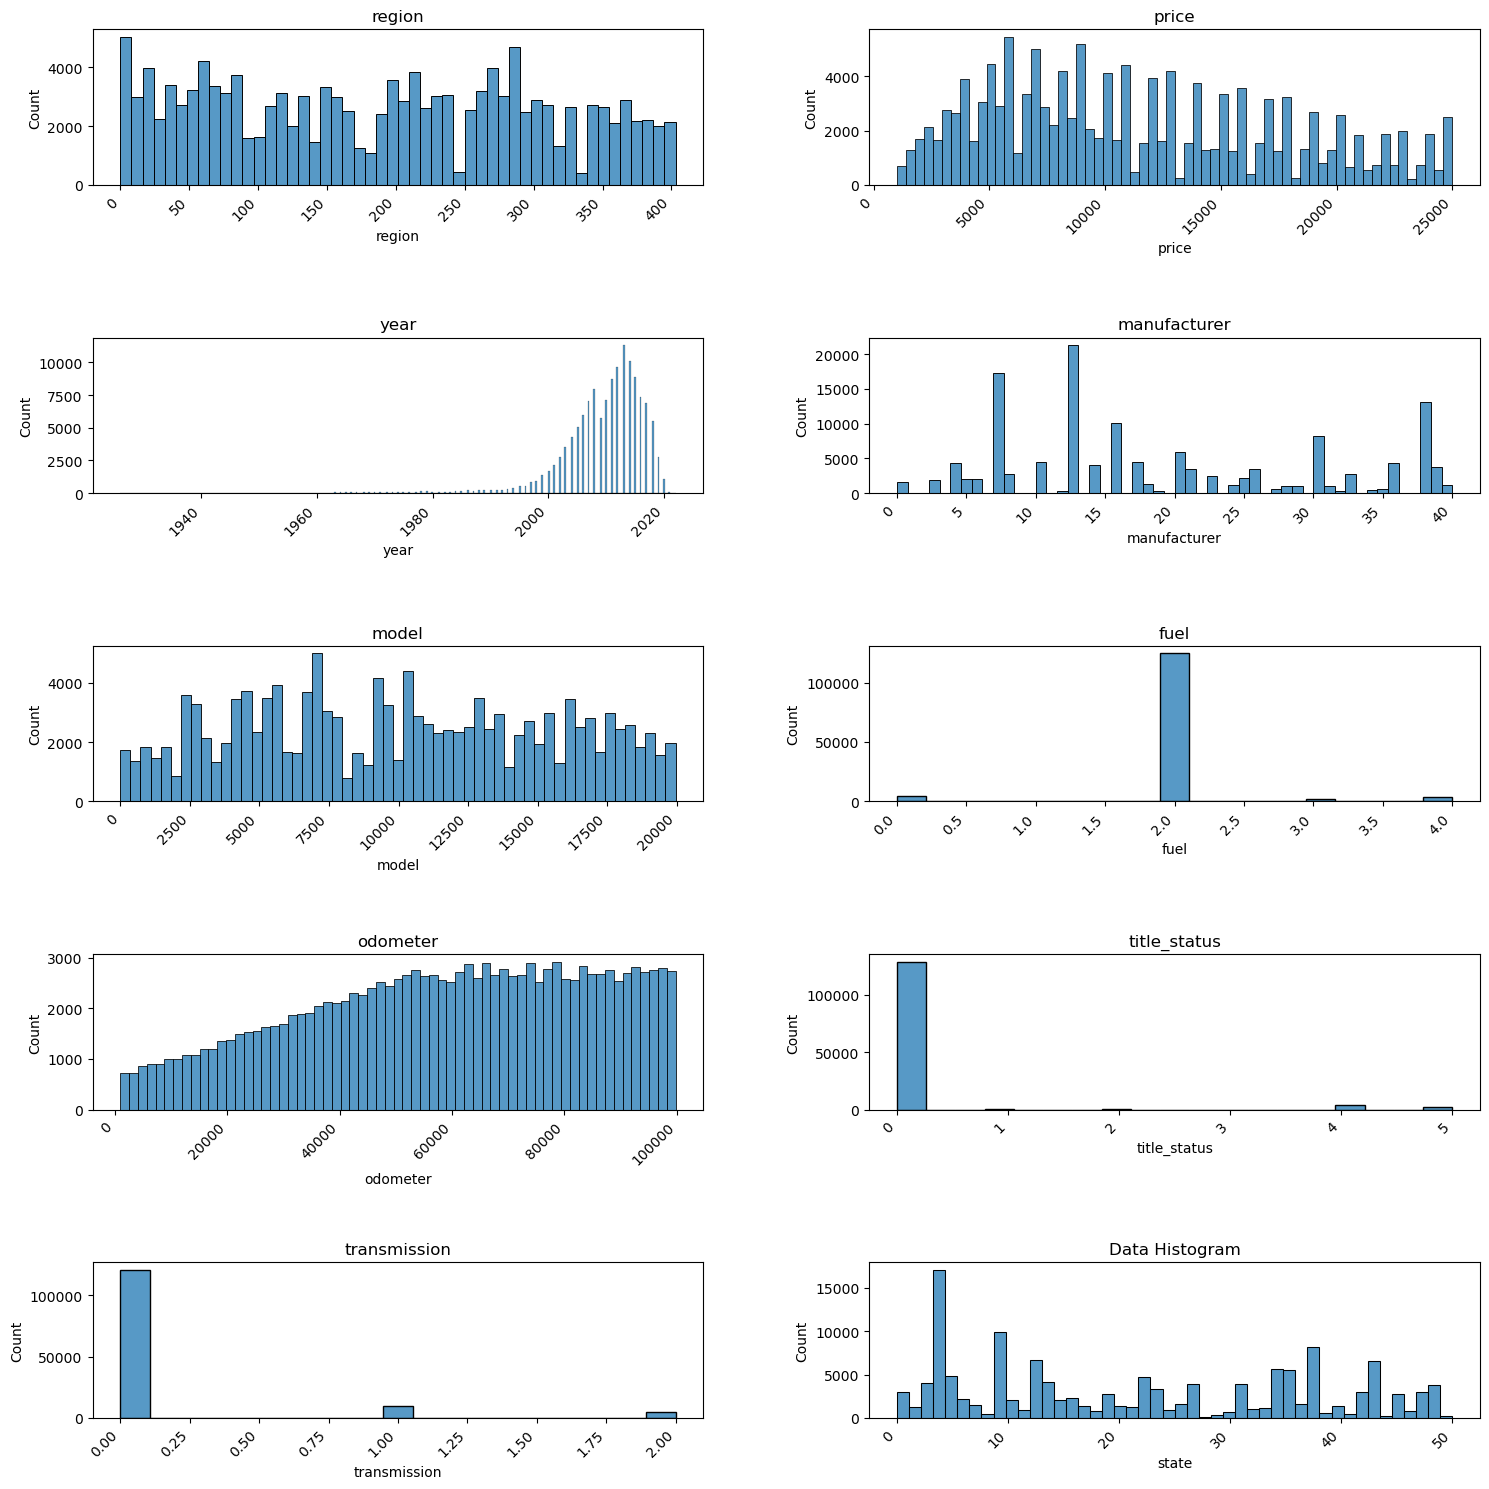

In [17]:
print_data_historgram(df, 5, 2, 'Data Histogram')

In [18]:
# from above:
# drop: fuel, title_status, transmissoin
# year < 1980

df = df.drop(columns=['fuel','title_status','transmission'])

year_less_1980 = df.index[np.where(df['year'] < 1980)]
print(f'num year < 1980 {len(year_less_1980)}')
df = (df.drop(year_less_1980))
df.info()

num year < 1980 2136
<class 'pandas.core.frame.DataFrame'>
Int64Index: 133259 entries, 28 to 426833
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        133259 non-null  float64
 1   price         133259 non-null  Int64  
 2   year          133259 non-null  Int64  
 3   manufacturer  133259 non-null  float64
 4   model         133259 non-null  float64
 5   odometer      133259 non-null  float64
 6   state         133259 non-null  float64
dtypes: Int64(2), float64(5)
memory usage: 8.4 MB


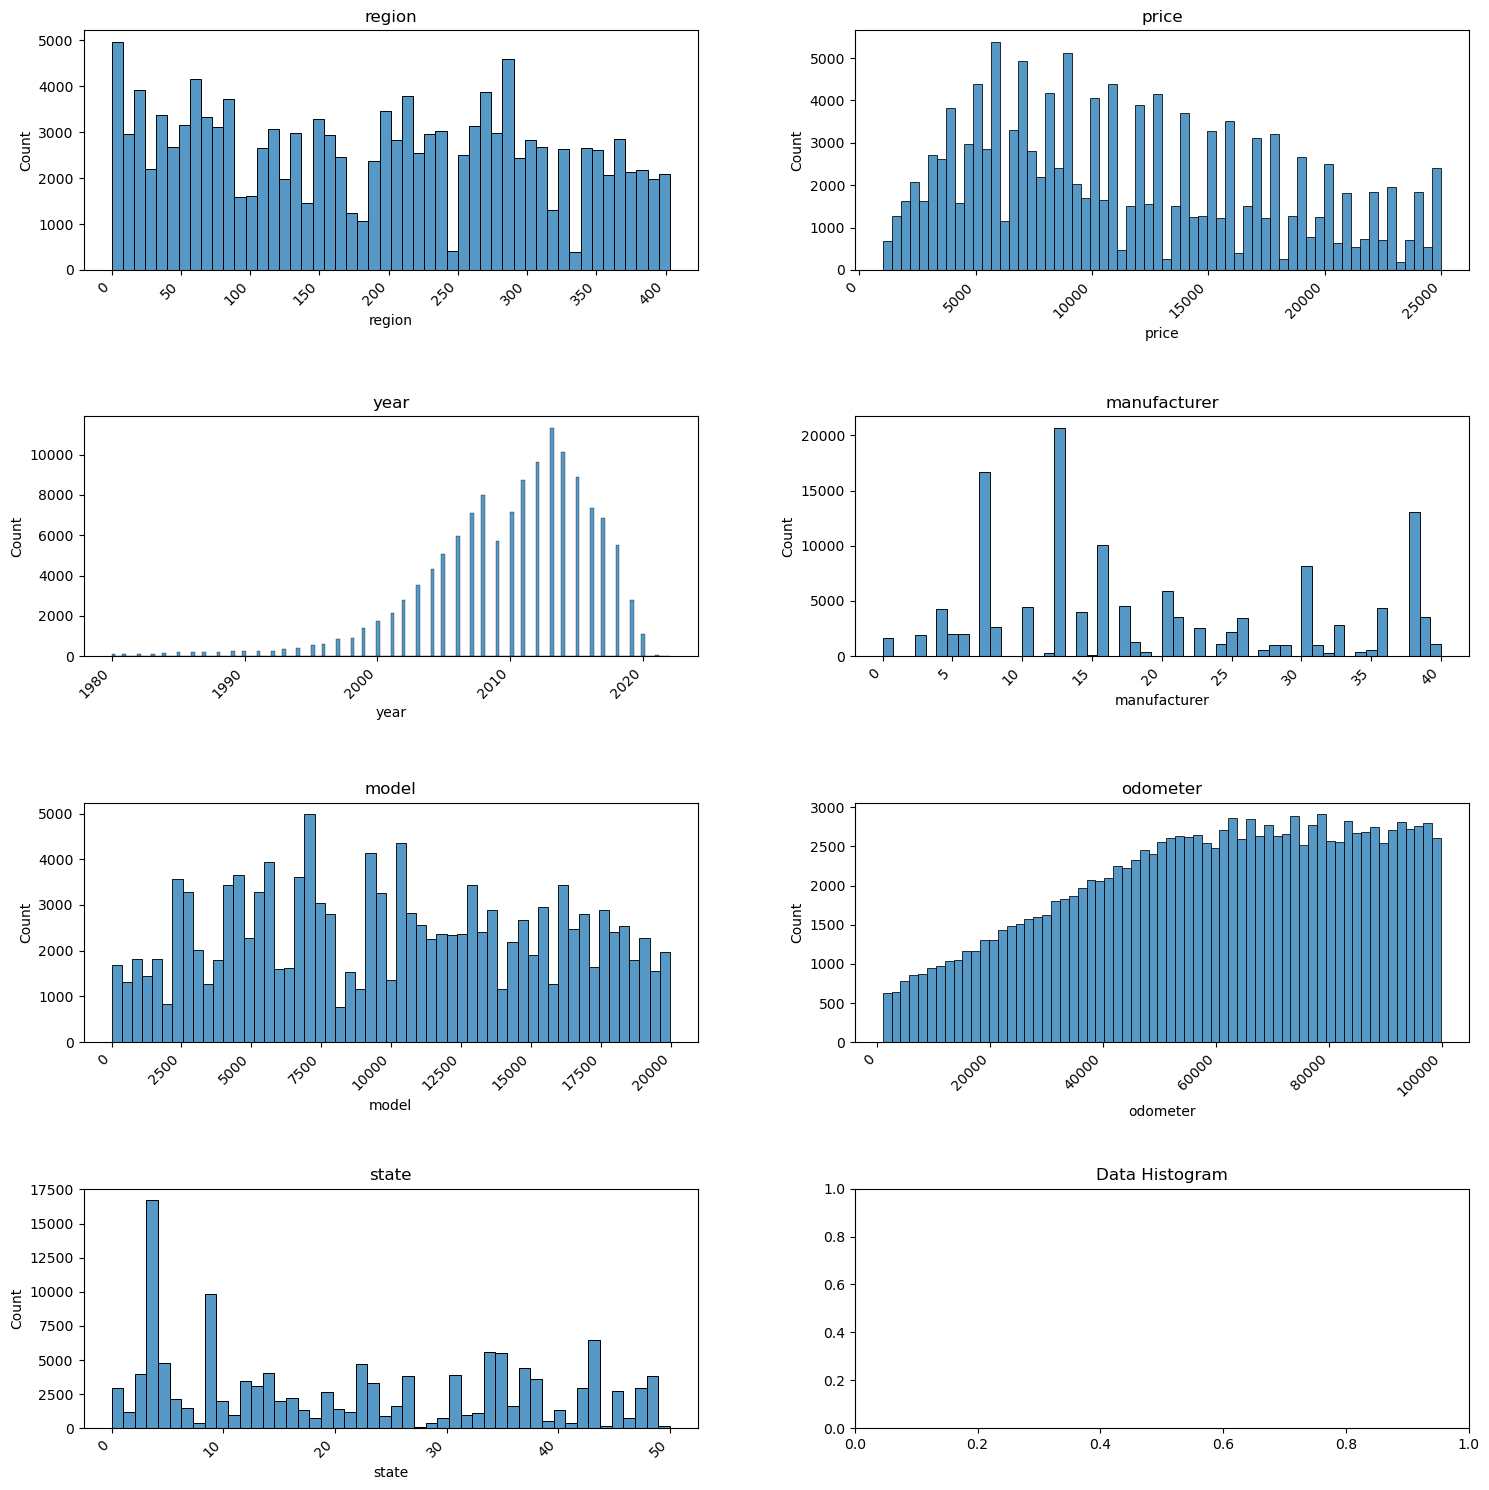

In [19]:
print_data_historgram(df, 4, 2, 'Data Histogram')

In [20]:
def generate_scatter_plot(yn_train, yn_train_pred, yn_test, yn_test_pred):
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 2, 1)
    sns.residplot(x=yn_train, y=yn_train_pred, lowess=True, scatter_kws={'s': 30, 'edgecolor': 'white'}, line_kws={'color': 'red', 'lw': '1'})
    plt.title(f'Training Residuals')

    plt.subplot(1, 2, 2)
    sns.residplot(x=yn_test, y=yn_test_pred, lowess=True, scatter_kws={'s': 30, 'edgecolor': 'white'}, line_kws={'color': 'red', 'lw': '1'})
    plt.title(f'Test Residuals')

    plt.show()

    # Generate predicted vs actual plots
    plt.figure(figsize=(12, 3))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=yn_train, y=yn_train_pred, s=30, edgecolor='white')
    plt.plot([yn_train.min(), yn_train.max()], [yn_train.min(), yn_train.max()], color='red', linewidth=1)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Training Predicted vs. Actual')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=yn_test, y=yn_test_pred, s=30, edgecolor='white')
    plt.plot([yn_test.min(), yn_test.max()], [yn_test.min(), yn_test.max()], color='red', linewidth=1)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'Test Predicted vs. Actual')

    plt.show()

In [21]:
def linear_regression_scatter_plot(df):
    # to plot need to convert all int64 into floats
    df_plot = df.astype('float')

    X = df_plot.drop(columns=['price']) # all data minus 'price'
    y = df_plot['price'] # only the 'price' column

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    lr = LinearRegression().fit(X_train, y_train)

    train_preds = lr.predict(X_train)
    test_preds = lr.predict(X_test)
    mse_train = mean_squared_error(y_train, train_preds)
    mse_test = mean_squared_error(y_test, test_preds)

    coefs = lr.coef_

    print(f'Training MSE {mse_train} Development MSE {mse_test}\ncoefs {coefs}')

    generate_scatter_plot(y_train, train_preds, y_test, test_preds)

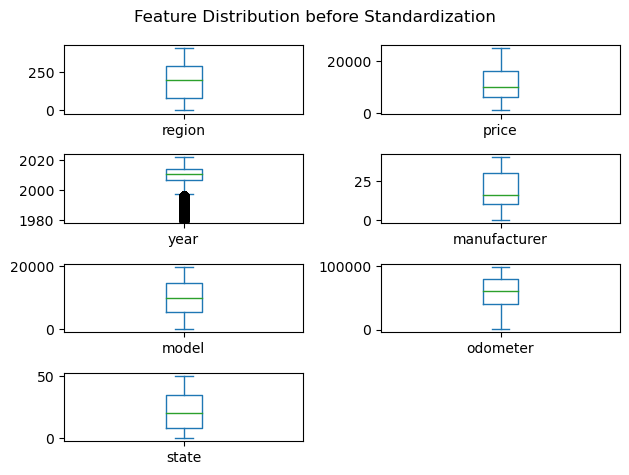

In [22]:
df.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, title="Feature Distribution before Standardization")
plt.tight_layout()

<Axes: title={'center': 'year Distribution'}>

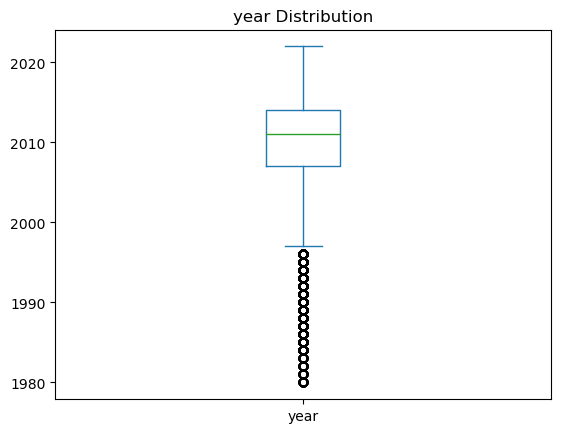

In [23]:
df.plot(kind='box', column='year', return_type='axes', title='year Distribution')

In [24]:
# scale the data
ss = StandardScaler()
df_2 = pd.DataFrame(ss.fit_transform(df), columns=ss.get_feature_names_out())

In [25]:
df_2.describe()

,region,price,year,manufacturer,model,odometer,state
count,1.332590e+05,1.332590e+05,1.332590e+05,1.332590e+05,1.332590e+05,1.332590e+05,1.332590e+05
mean,-8.701894e-17,-1.449249e-16,-1.498102e-14,-1.603879e-16,-1.013088e-17,1.006690e-16,-1.365003e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-1.605674e+00,-1.654764e+00,-4.830208e+00,-1.689929e+00,-1.834868e+00,-2.275515e+00,-1.445304e+00
25%,-9.234025e-01,-8.554865e-01,-4.818961e-01,-8.098583e-01,-8.547577e-01,-7.481843e-01,-9.141025e-01
50%,5.736349e-02,-2.158408e-01,1.622982e-01,-2.818157e-01,-2.364325e-02,8.429182e-02,-1.173000e-01
75%,8.419762e-01,7.432279e-01,6.454439e-01,9.502837e-01,8.547540e-01,8.377600e-01,8.787032e-01
max,1.831271e+00,2.183590e+00,1.933833e+00,1.830355e+00,1.822402e+00,1.597660e+00,1.874706e+00


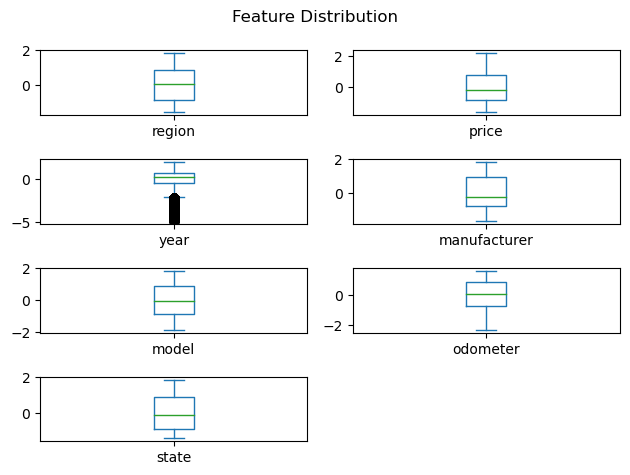

In [26]:
df_2.plot(kind='box', subplots=True, layout=(4,2), sharex=False, sharey=False, title="Feature Distribution")
plt.tight_layout()

Training MSE 0.6157159444871375 Development MSE 0.6204597680972314
coefs [-0.01796291  0.35782479 -0.0380825   0.03416006 -0.35935447 -0.0338324 ]


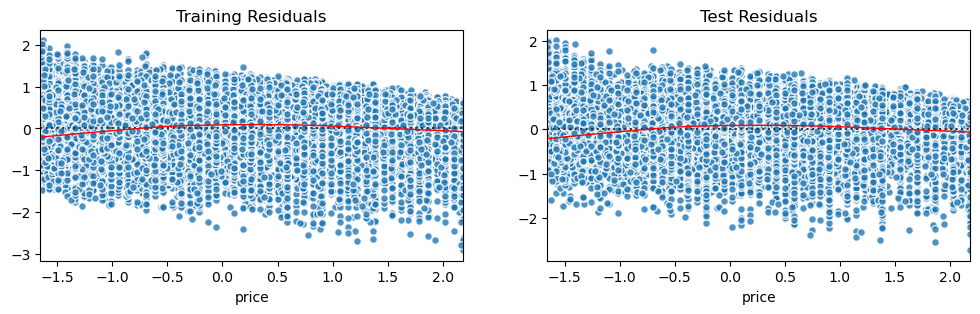

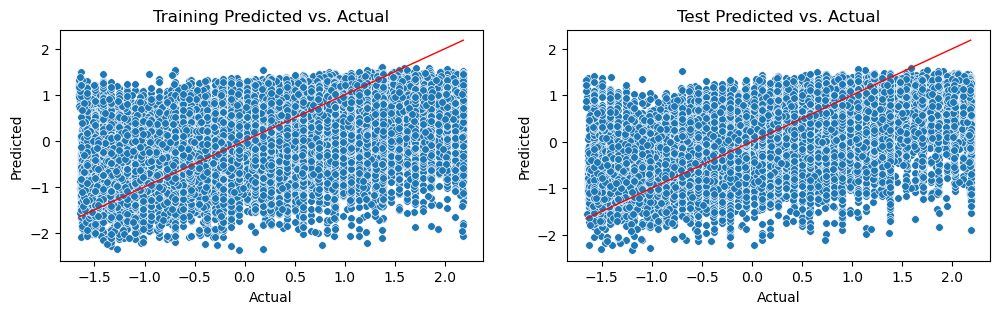

In [27]:
linear_regression_scatter_plot(df_2)

Percent variance: 1.0000000000000002
Number components necessary to retain 80% variance: 5


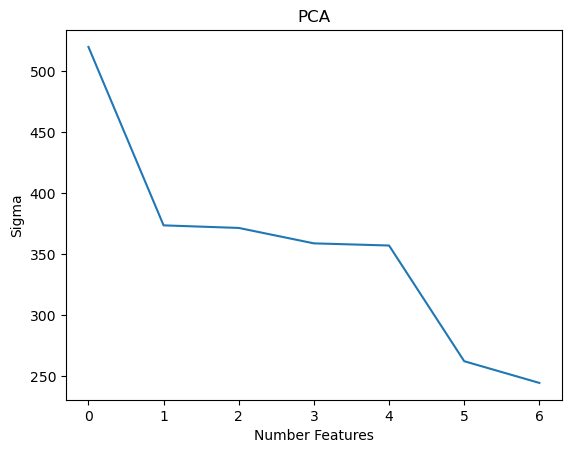

In [28]:
# Principal Component Aanalysis

df_scaled = pd.DataFrame((df_2 - df_2.mean())/df_2.std())
U, sigma, Vt = svd(df_scaled, full_matrices=False)

plt.plot(sigma)
plt.title('PCA')
plt.xlabel("Number Features")
plt.ylabel("Sigma")

percent_variance = sigma/sigma.sum()
print(f'Percent variance: {percent_variance.sum()}')

# Number components necessary to retain 80% of variance
num_components = (np.cumsum(percent_variance) < 0.8).sum()
print(f'Number components necessary to retain 80% variance: {num_components}')

In [29]:
# Sequential Feature Selection

def sequential_feature_selector(X, y, train_idx, test_idx, num_iterations):
    mse_list = []
    num_features_list = []
    data_frames_dict = {}

    for num_features in num_iterations:
        selector = SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=num_features,
                                           cv=[[train_idx, test_idx]],
                                           scoring = 'neg_mean_squared_error')
        Xt = selector.fit_transform(X, y)
        lr = LinearRegression().fit(Xt, y)
        model_preds = lr.predict(Xt)
        mse = mean_squared_error(y, model_preds)

        data_frame = pd.DataFrame(selector.fit_transform(X, y),
                                  columns = selector.get_feature_names_out())
        data_frames_dict[num_features] = data_frame

        mse_list.append(mse)
        num_features_list.append(num_features)

    return data_frames_dict, mse_list, num_features_list

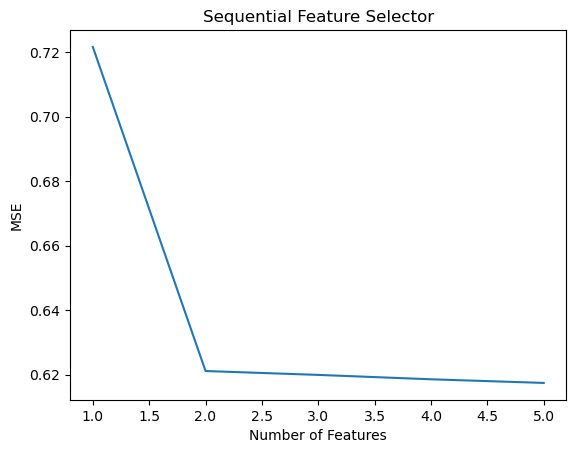

In [30]:
all_indicies = list(range(0, len(df_2)))
seed(42)
shuffle(all_indicies)
train_idx, test_idx = np.split(all_indicies, [106521]) #(106521,) (26631,)

X = df_2.drop('price', axis=1)
y = df_2['price']

num_features_to_try = [1,2,3,4,5]
data_frames_dict, mse_list, num_features_list = sequential_feature_selector(X,y,train_idx,test_idx,num_features_to_try)

mse_num_features_plot = sns.lineplot(x=num_features_list, y=mse_list)
mse_num_features_plot.set(xlabel='Number of Features', ylabel='MSE', title='Sequential Feature Selector')
plt.show()

In [31]:
data_frames_dict

{1:             year
 0       0.001250
 1       0.484395
 2      -2.897625
 3       1.128590
 4       1.128590
 ...          ...
 133254 -0.965042
 133255 -0.642945
 133256 -3.219722
 133257  0.967541
 133258 -2.092382
 
 [133259 rows x 1 columns],
 2:             year  odometer
 0       0.001250 -0.839331
 1       0.484395  0.384126
 2      -2.897625  1.271902
 3       1.128590 -1.467982
 4       1.128590 -1.496691
 ...          ...       ...
 133254 -0.965042  1.222328
 133255 -0.642945  1.327398
 133256 -3.219722  0.112059
 133257  0.967541 -1.804252
 133258 -2.092382 -0.876746
 
 [133259 rows x 2 columns],
 3:             year     model  odometer
 0       0.001250  1.095933 -0.839331
 1       0.484395 -0.385778  0.384126
 2      -2.897625 -1.003020  1.271902
 3       1.128590  1.116642 -1.467982
 4       1.128590 -1.777139 -1.496691
 ...          ...       ...       ...
 133254 -0.965042 -0.209292  1.222328
 133255 -0.642945  1.133869  1.327398
 133256 -3.219722 -0.025109  0.112059

In [34]:
# LinearRegression using 2 features: year and model
X = df_2[['year', 'model']]
y = df_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predict_test = model.predict(X_test)
predict_train = model.predict(X_train)
train_mse = mean_squared_error(y_train, predict_train)
test_mse = mean_squared_error(y_test, predict_test)
score = model.score(X_test, y_test)

print(f'LinearRegression using "year" and "model"\ntrain_mse {train_mse} test_mse {test_mse}\nscore {score}')

LinearRegression using "year" and "model"
train_mse 0.7185412066878015 test_mse 0.7278383367292922
score 0.27523327346995086


Text(0.5, 1.0, 'LinearRegression, Training "Price" Predicted vs. Actual')

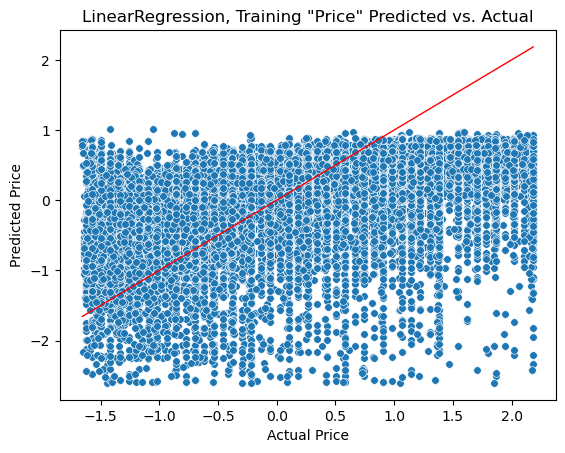

In [35]:
sns.scatterplot(x=y_test, y=predict_test, s=30, edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'LinearRegression, Training "Price" Predicted vs. Actual')

In [36]:
# Find best alpha for Ridge regression

X = df_2.drop('price', axis=1)
y = df_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
params_dict = {'alpha': 1000**np.linspace(-5,5,10)}

model = GridSearchCV(Ridge(), param_grid=params_dict)
model.fit(X_train, y_train)

train_mse = mean_squared_error(y_train, model.predict(X_train))
test_mse = mean_squared_error(y_test, model.predict(X_test))
best_alpha = model.best_params_['alpha']
score = model.score(X_test, y_test)


print(f'train_mse {train_mse} test_mse {test_mse}\nscore {score} best_alpha {best_alpha}')

train_mse 0.6157159888162558 test_mse 0.6204584097035241
score 0.38216003766765405 best_alpha 46.41588833612773


In [37]:
# Permutation feature importance
# src: https://scikit-learn.org/stable/modules/permutation_importance.html

def print_permutation_importance_for_model(model, X_test, y_test):
    scoring = ['r2', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error']
    multi_metrics = permutation_importance(model, X_test, y_test, n_repeats=25, random_state=0, scoring=scoring)

    for metric in multi_metrics:
        print(f'{metric}')
        r = multi_metrics[metric]
        for i in r.importances_mean.argsort()[::-1]:
            if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
                print(f'    {df_2.columns[i]:<14}'
                      f'{r.importances_mean[i]:.3f}'
                      f' +/- {r.importances_std[i]:.3f}')

In [38]:
print('Permutation Importance based on GridSearchCV and Ridge regression')
print_permutation_importance_for_model(model, X_test, y_test)

Permutation Importance based on GridSearchCV and Ridge regression
r2
    model         0.258 +/- 0.004
    price         0.256 +/- 0.003
    manufacturer  0.003 +/- 0.000
    year          0.003 +/- 0.000
    odometer      0.002 +/- 0.000
    region        0.001 +/- 0.000
neg_mean_absolute_percentage_error
    model         0.105 +/- 0.024
    price         0.097 +/- 0.033
    manufacturer  0.015 +/- 0.003
neg_mean_squared_error
    model         0.259 +/- 0.004
    price         0.257 +/- 0.003
    manufacturer  0.003 +/- 0.000
    year          0.003 +/- 0.000
    odometer      0.002 +/- 0.000
    region        0.001 +/- 0.000


In [39]:
# Rigde regression with best alpha
alpha = 46.41588833612773

X = df_2.drop('price', axis=1)
y = df_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = Pipeline([
    ('ridge', Ridge(alpha=46.41588833612773))
])
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, predict_train)
test_mse = mean_squared_error(y_test, predict_test)

print(f'Ridge regression with alpha {alpha}\ntrain_mse {train_mse} test_mse {test_mse}')

Ridge regression with alpha 46.41588833612773
train_mse 0.6157159888162558 test_mse 0.6204584097035241


Text(0.5, 1.0, 'Ridge Regression Using Best Alpha, Training "Price" Predicted vs. Actual')

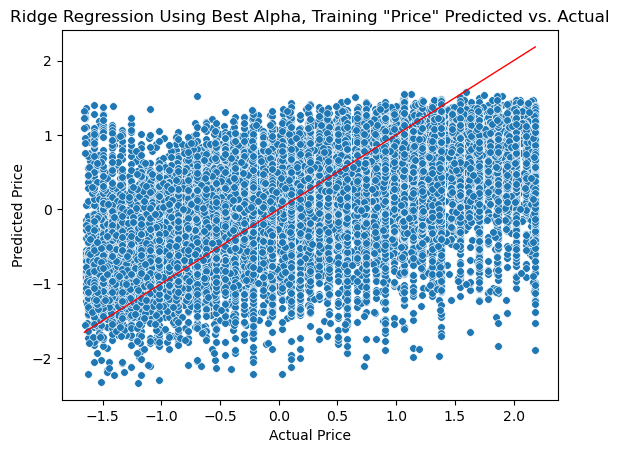

In [40]:
# get the same indices from the original data set for 'price'
sns.scatterplot(x=y_test, y=predict_test, s=30, edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Ridge Regression Using Best Alpha, Training "Price" Predicted vs. Actual')

In [41]:
# Lasso regression
X = df_2.drop('price', axis=1)
y = df_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = Pipeline([
    ('ridge', Lasso(random_state = 42))
])
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, predict_train)
test_mse = mean_squared_error(y_test, predict_test)

print(f'Lasso regression\ntrain_mse {train_mse} test_mse {test_mse}')

Lasso regression
train_mse 0.9981798746904355 test_mse 1.0042507047875298


Text(0.5, 1.0, 'Lasso Regression, Training "Price" Predicted vs. Actual')

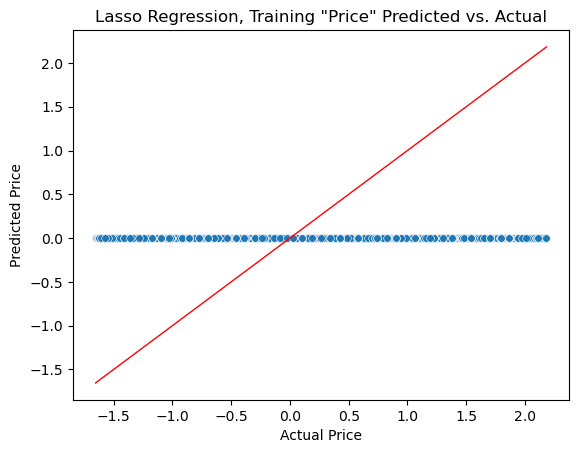

In [42]:
sns.scatterplot(x=y_test, y=predict_test, s=30, edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Lasso Regression, Training "Price" Predicted vs. Actual')

In [43]:
# Polynomial Features

X = df_2.drop('price', axis=1)
y = df_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params_dict = {'poly_features__degree': [3,4,6]}

pipe = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('lreg', LinearRegression())
])
model = GridSearchCV(estimator=pipe, scoring='neg_mean_squared_error', param_grid=params_dict)
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, predict_train)
test_mse = mean_squared_error(y_test, predict_test)

best_poly_degree = model.best_params_['poly_features__degree']
best_model = model.best_estimator_

print(f'Polynomial Features with Linear Regression\n \
train_mse {train_mse} test_mse {test_mse}\n best model {best_model}\n \
best polynomial degree {best_poly_degree}')



Polynomial Features with Linear Regression
 train_mse 0.49316110284894105 test_mse 0.5057053688301261
 best model Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=6, include_bias=False)),
                ('lreg', LinearRegression())])
 best polynomial degree 6


In [44]:
# Poly. model with 6 features

X = df_2.drop('price', axis=1)
y = df_2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = Pipeline([
    ('poly_features', PolynomialFeatures(degree=6, include_bias=False)),
    ('lreg', LinearRegression())
])
model.fit(X_train, y_train)
predict_train = model.predict(X_train)
predict_test = model.predict(X_test)
train_mse = mean_squared_error(y_train, predict_train)
test_mse = mean_squared_error(y_test, predict_test)

print(f'Poly.^6 with Linear Regression\ntrain_mse {train_mse} test_mse {test_mse}')

Poly.^6 with Linear Regression
train_mse 0.49316110284894105 test_mse 0.5057053688301261


Text(0.5, 1.0, 'Poly.^6 with Linear Regression, Training "Price" Predicted vs. Actual')

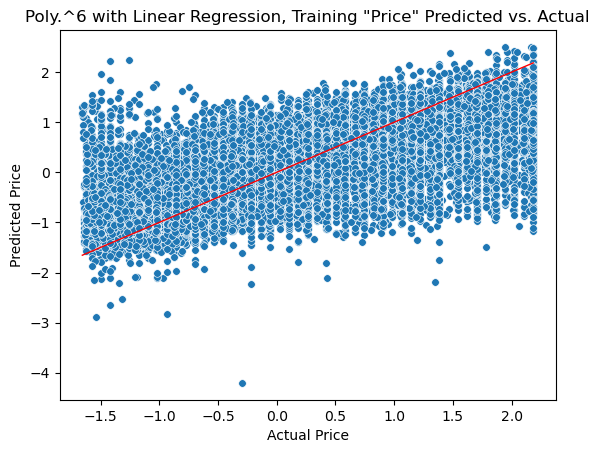

In [45]:
sns.scatterplot(x=y_test, y=predict_test, s=30, edgecolor='white')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=1)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Poly.^6 with Linear Regression, Training "Price" Predicted vs. Actual')